In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import roc_curve, auc 
from sklearn.preprocessing import label_binarize 
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_auc_score 

from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

In [59]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [88]:
data =  pd.read_csv('iris.csv')

In [89]:
data.head()

,Unnamed: 5,sepal.length,sepal.width,petal.length,petal.width,variety
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,Setosa
2,3,4.7,3.2,1.3,0.2,Setosa
3,4,4.6,3.1,1.5,0.2,Setosa
4,5,5.0,3.6,1.4,0.2,Setosa


In [90]:
data.tail()

,Unnamed: 5,sepal.length,sepal.width,petal.length,petal.width,variety
145,146,6.7,3.0,5.2,2.3,Virginica
146,147,6.3,2.5,5.0,1.9,Virginica
147,148,6.5,3.0,5.2,2.0,Virginica
148,149,6.2,3.4,5.4,2.3,Virginica
149,150,5.9,3.0,5.1,1.8,Virginica


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 5    150 non-null    int64  
 1   sepal.length  150 non-null    float64
 2   sepal.width   150 non-null    float64
 3   petal.length  150 non-null    float64
 4   petal.width   150 non-null    float64
 5   variety       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [92]:
data.describe()

,Unnamed: 5,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [93]:
data['variety'].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: variety, dtype: int64

In [94]:
tmp = data.drop('Unnamed: 5', axis=1)
tmp.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


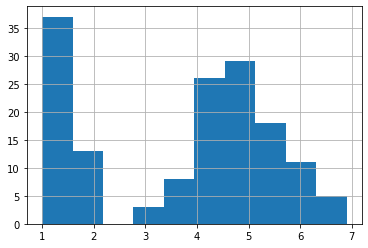

In [95]:
data['petal.length'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c6abb4c50>,
      dtype=object)

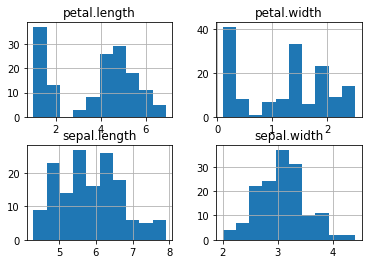

In [96]:
tmp.hist()

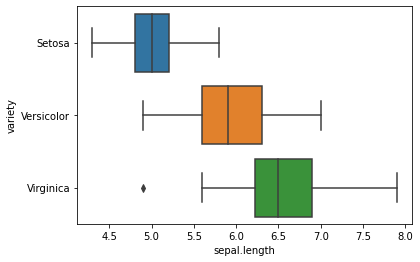

In [97]:
sns.boxplot(x='sepal.length',y='variety',data=tmp)



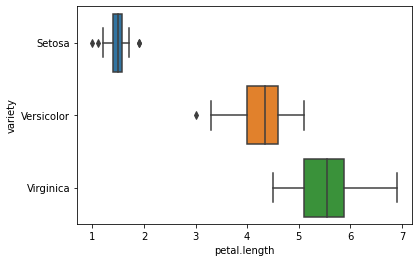

In [98]:
sns.boxplot(x='petal.length',y='variety',data=tmp)


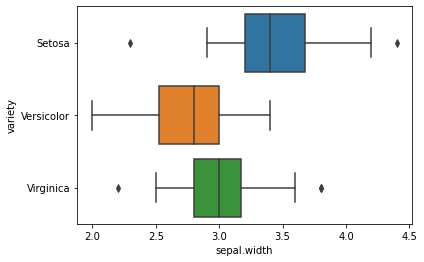

In [99]:

sns.boxplot(x='sepal.width',y='variety',data=tmp)


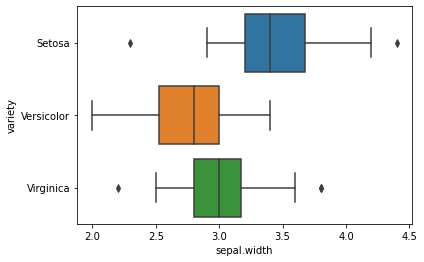

In [100]:

sns.boxplot(x='sepal.width',y='variety',data=tmp)

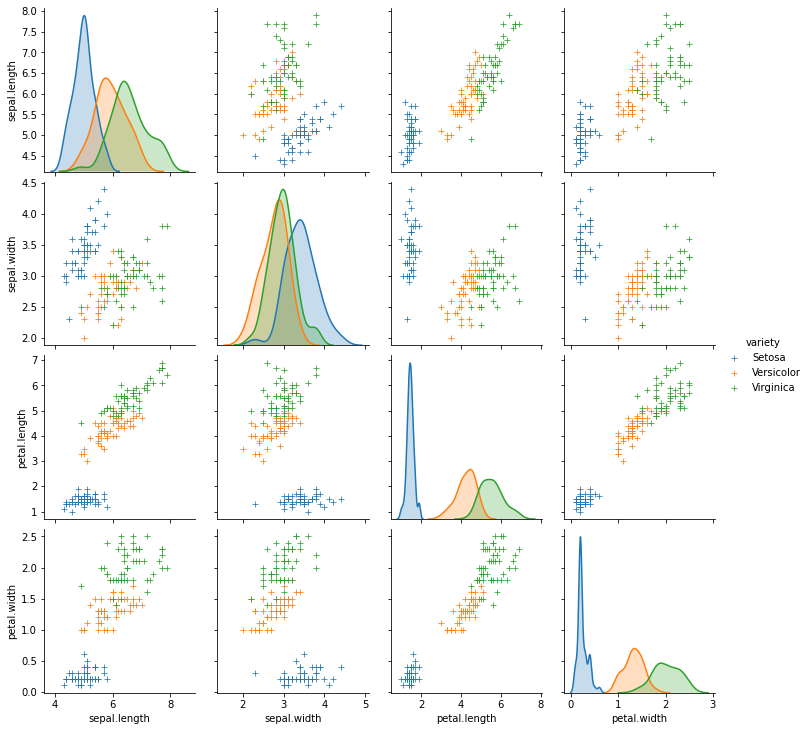

In [101]:
sns.pairplot(tmp, hue='variety',markers='+')

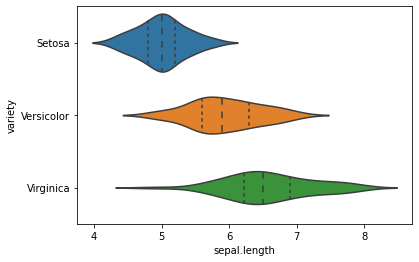

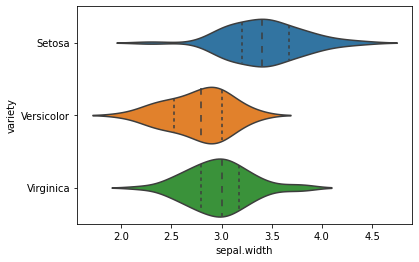

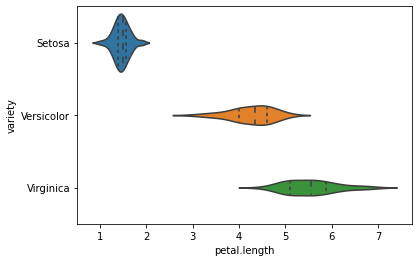

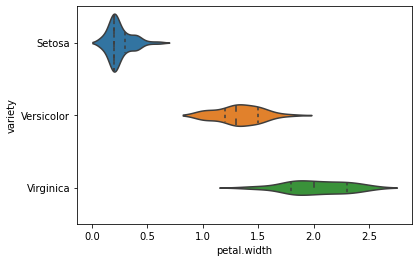

In [102]:
g = sns.violinplot(y='variety', x='sepal.length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='sepal.width', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal.length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal.width', data=data, inner='quartile')
plt.show()


In [103]:
X = data.drop(['Unnamed: 5', 'variety'], axis=1)
y = data['variety']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)


(150, 4)
(150,)


In [104]:
tmp.median()

sepal.length    5.80
sepal.width     3.00
petal.length    4.35
petal.width     1.30
dtype: float64

In [105]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.4, random_state=5) 
print(xtrain.shape) 
print(ytrain.shape) 
print(xtest.shape) 
print(ytest.shape)  

(90, 4)
(90,)
(60, 4)
(60,)


In [107]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain) 
xtest = scaler.transform(xtest)


In [108]:
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000) 
mlp.fit(xtrain, ytrain.values.ravel())
 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [110]:
 pred = mlp.predict(xtest)    
 print(accuracy_score(ytest,pred))


0.95


In [111]:
print(mlp.predict([[1.5,0.1,0.1,0.5]]))


['Versicolor']
